In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import inv
from math import log, sqrt, ceil, sin, pi

from enum import Enum

Generalization Error

In [2]:
class NumberOfExamples:
     """Class for computing minimum number of training examples needed"""
    
#@staticmethod
def VC(eps, delta, vcdim):
    """Compute number of training examples needed using the VC Bound
    Args:
    eps (float): Difference between 
    delta (float): 0.0 <= probability that epsilon will hold <= 1.0
    vcdim (int): VC dimension
    Returns:
    N (int): Minimum number of training examples needed
    """
    N_prev = 390000
    tol=1.0
    maxIter = 100
    
    # epsilon      
    for i in range(0, maxIter):
        N = (8.0 / eps**2) * log(4.0 * (2 * N_prev)**vcdim / delta)
        if abs(N - N_prev) <= tol:
            break
        N_prev = N
    
    return ceil(N)

In [3]:
VC(0.05, 0.05, 10)

452957

In [4]:
class Bounds:
    """Class for computing generalization bounds"""
    
    @staticmethod
    def VC(N, delta, vcdim):
        """Compute generalization error using the VC Bound
        Args:
        N (int): Number of training examples
        delta (float): 0.0 <= probability that epsilon will hold <= 1.0
        vcdim (int): VC dimension
        Returns:
        epsilon (float): Generalization error
        """
        # Growth function based on N and VC dimension
        #if N <= vcdim:
        #    mh = 2.0**N
        #else:
        mh = (2.0 * N)**vcdim
        
        # epsilon
        eps = sqrt((8.0 / N) * log(4.0 * mh / delta))
        return eps
    
    @staticmethod
    def Rademacher(N, delta, vcdim):
        """Compute generalization error using the Rademacher Penalty Bound
        Args:
        N (int): Number of training examples
        delta (float): 0.0 <= probability that epsilon will hold <= 1.0
        vcdim (int): VC dimension
        Returns:
        epsilon (float): Generalization error
        """
        # Growth function based on N and VC dimension
        #if N <= vcdim:
        #    mh = 2**N
        #else:
        mh = N**vcdim
        
        # epsilon
        eps = sqrt(2.0 * log(2.0 * N * mh) / N) + sqrt((2.0 / N) * log(1.0 / delta)) + 1.0 / N
        return eps
    
    @staticmethod
    def Parrando(N, delta, vcdim):
        """Compute generalization error using the Parrondo and Van den Broek Bound
        Args:
        N (int): Number of training examples
        delta (float): 0.0 <= probability that epsilon will hold <= 1.0
        vcdim (int): VC dimension
        Returns:
        epsilon (float): Generalization error
        """
        # Growth function based on N and VC dimension
        #if N <= vcdim:
        #    mh = 2**N
        #else:
        mh = (2 * N)**vcdim
        
        # epsilon
        tol=1e-2
        maxIter = 100
        eps_prev = 0.5
        for i in range(0, maxIter):
            eps = sqrt((1.0 / N) * (2.0 * eps_prev + log(6.0 * mh / delta)))
            if abs(eps - eps_prev) <= tol:
                break
            eps_prev = eps
        return eps
    
    @staticmethod
    def Devroye(N, delta, vcdim):
        """Compute generalization error using the Devroye Bound
        Args:
        N (int): Number of training examples
        delta (float): 0.0 <= probability that epsilon will hold<= 1.0
        vcdim (int): VC dimension
        Returns:
        epsilon (float): Generalization error
        """
        # Growth function based on N and VC dimension
        #if N <= vcdim:
            #mh = 2**N
            #logmh = 2 * log(N)
        #else:
            #mh = (N**2)**vcdim leads to overflow error
        logmh = 2 * vcdim * log(N)
        
        # epsilon
        tol=1e-2
        maxIter = 100
        eps_prev = 0.5
        for i in range(0, maxIter):
            eps = sqrt((1.0 / (2.0 * N)) * (4.0 * eps_prev * (1.0 + eps_prev) + log(4.0 / delta) + logmh))
            if abs(eps - eps_prev) <= tol:
                break
            eps_prev = eps
        return eps

In [5]:
delta = 0.05
vcdim = 50
N = 10001
vc = np.log([Bounds.VC(n, delta, vcdim) for n in range(3, N)])
rade = np.log([Bounds.Rademacher(n, delta, vcdim) for n in range(3, N)])
parr = np.log([Bounds.Parrando(n, delta, vcdim) for n in range(3, N)])
dev = np.log([Bounds.Devroye(n, delta, vcdim) for n in range(3, N)])

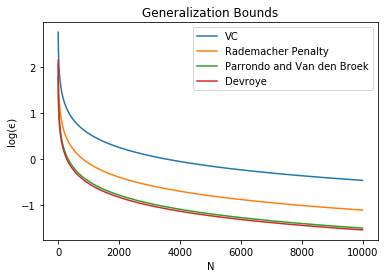

In [6]:
plt.plot(vc, label='VC')
plt.plot(rade, label='Rademacher Penalty')
plt.plot(parr, label ='Parrondo and Van den Broek')
plt.plot(dev, label='Devroye')
plt.title('Generalization Bounds')
plt.xlabel('N')
plt.ylabel('log(ϵ)')
plt.legend()

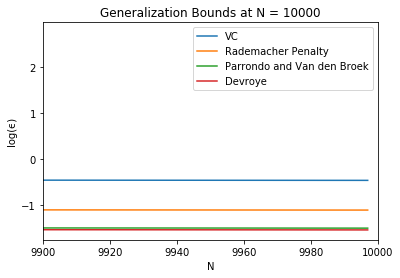

In [7]:
plt.plot(vc, label='VC')
plt.plot(rade, label='Rademacher Penalty')
plt.plot(parr, label ='Parrondo and Van den Broek')
plt.plot(dev, label='Devroye')
plt.title('Generalization Bounds at N = 10000')
plt.xlabel('N')
plt.ylabel('log(ϵ)')
plt.xlim((9900, 10000))
plt.legend()

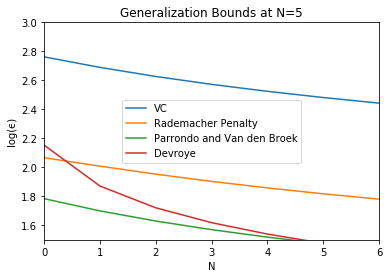

In [8]:
plt.plot(vc, label='VC')
plt.plot(rade, label='Rademacher Penalty')
plt.plot(parr, label ='Parrondo and Van den Broek')
plt.plot(dev, label='Devroye')
plt.title('Generalization Bounds at N=5')
plt.xlabel('N')
plt.ylabel('log(ϵ)')
plt.xlim((0, 6))
plt.ylim((1.5, 3))
plt.legend()

Bias and Variance

In [9]:
class Point:
    """ Point class. """
    
    def __init__(self, lower=-1.0, upper=1.0):
        """ Create a new point assuming a uniform distribution between the upper and lower bounds. 
        Args:
        lower (float): Lower bound.
        upper (float): Upper bound.
        """
        self.lower = lower # lower bound
        self.upper = upper # upper bound
        self.value = np.random.uniform(lower, upper) # value

In [10]:
class TargetFunction:
    """TargetFunction class. """
    
    def evaluate(self, point):  
        return sin(pi * point.value)

In [11]:
class DataSet:
    """ DataSet class. """
    def __init__(self, N=2, lower=-1.0, upper=1.0):
        """ Create a new data set assuming a uniform distribution between the 
            upper and lower bounds. 
        Args:
        N (int): Number of points.
        lower (float): Lower bound.
        upper (float): Upper bound.
        """
        self.inputs = [Point(lower, upper) for i in range(0,N)]
        self.outputs = [TargetFunction().evaluate(input) for input in self.inputs]

In [12]:
class Hypothesis(Enum):
    CONSTANT = 1
    LINEAR = 2
    LINEAR_PLUS_CONSTANT = 3
    QUADRATIC = 4
    QUADRATIC_PLUS_CONSTANT = 5

In [13]:
class LinearRegression:
    """ Linear Regression class. """
    
    def __init__(self, trainingSet, hypothesis=Hypothesis.LINEAR_PLUS_CONSTANT):
        """ Create a new Linear Regression. 
        Args:
        TrainingSet (DataSet): Training set.
        """
        self.trainingSet = trainingSet
        self.hypothesis = hypothesis
        
    def run(self, targetFunction):    
        """Run of Linear Regression Algorithm.
        See equations at http://facweb.cs.depaul.edu/sjost/csc423/documents/technical-details/lsreg.pdf
        for regression for a horizontal line, regression through the origin and simple regression
        Args:
        targetFunction (TargetFunction): Target function
        Returns:
        Tuple(g, yn)
        """
        # calculate outputs
        yn = np.array([targetFunction.evaluate(input) for input in self.trainingSet.inputs], copy=True)
        
        if self.hypothesis == Hypothesis.CONSTANT:
            return np.mean(yn)     
        elif self.hypothesis == Hypothesis.LINEAR or self.hypothesis == Hypothesis.QUADRATIC:
            X = self.transformPoints(trainingSet.inputs) # transform inputs
            X_trans = np.transpose(X) 
            return np.divide(np.matmul(X_trans, yn), np.matmul(X_trans, X))
        elif self.hypothesis == Hypothesis.LINEAR_PLUS_CONSTANT or self.hypothesis == Hypothesis.QUADRATIC_PLUS_CONSTANT:
            # calculate pseudo-inverse matrix and return g (weights)
            X = self.transformPoints(trainingSet.inputs) # transform inputs
            X_trans = np.transpose(X)
            X_dagger = np.matmul(inv(np.matmul(X_trans, X)), X_trans)
            g = np.matmul(X_dagger, yn)
            return g, yn
        
        return None
    
    # privates
    def transformPoints(self, points):
        if self.hypothesis == Hypothesis.QUADRATIC_PLUS_CONSTANT:
            featureVectors = []
            for pnt in points:
                featureVector = [1.0, pnt.value**2]
                featureVectors.append(featureVector)
            return np.array(featureVectors)
        elif self.hypothesis == Hypothesis.QUADRATIC:
            featureVectors = []
            for pnt in points:
                featureVector = [pnt.value**2]
                featureVectors.append(featureVector)
            return np.array(featureVectors)
        elif self.hypothesis == Hypothesis.LINEAR_PLUS_CONSTANT:
            return np.array([np.insert(pnt.value, 0, 1.0) for pnt in points])
        elif self.hypothesis == Hypothesis.LINEAR:
            return np.array([pnt.value for pnt in points])
        
        return None

In [14]:
gs=[]
trainingSets = []
for i in range(0, 100000):
    trainingSet = DataSet(N=2, lower=-1.0, upper=1.0)
    linearRegression = LinearRegression(trainingSet, hypothesis=Hypothesis.CONSTANT)
    g = linearRegression.run(TargetFunction())
    trainingSets.append(trainingSet)
    gs.append(g)

gbar = np.mean(gs)
bbar = gbar

biases = []
variances = []
        
for i in range(0, len(trainingSets)):
    bias_set = []
    vars_set = []
    for j in range(0, len(trainingSets[i].inputs)):
        x = trainingSets[i].inputs[j].value
        f = trainingSets[i].outputs[j]
        bhat = gs[i]
        bias_set.append((bbar - f)**2)
        vars_set.append((bhat - bbar)**2)
                
    biases.append(np.mean(bias_set))
    variances.append(np.mean(vars_set))

bias = np.round(np.mean(biases), 2)
variance = np.round(np.mean(variances), 2)
eout = np.round(bias + variance, 2)

print("g_bar(x) = {}".format(np.round(bbar, 2)))
print("bias = {}".format(bias))
print("variance = {}".format(variance))
print("Eout = {}".format(eout))

g_bar(x) = -0.0
bias = 0.5
variance = 0.25
Eout = 0.75


In [34]:
gs=[]
trainingSets = []
for i in range(0, 100000):
    trainingSet = DataSet(N=2, lower=-1.0, upper=1.0)
    linearRegression = LinearRegression(trainingSet, hypothesis=Hypothesis.LINEAR_PLUS_CONSTANT)
    g, yn = linearRegression.run(TargetFunction())
    trainingSets.append(trainingSet)
    gs.append(g)

gbar = np.mean(np.array(gs), axis=0)
abar = gbar[1]
bbar = gbar[0]

biases = []
variances = []

for i in range(0, len(trainingSets)):
    bias_set = []
    vars_set = []
    for j in range(0, len(trainingSets[i].inputs)):
        x = trainingSets[i].inputs[j].value
        f = trainingSets[i].outputs[j]
        ahat = gs[i][1]
        bhat = gs[i][0]
        bias_set.append((abar * x + bbar - f)**2)
        vars_set.append(((ahat * x + bhat) - (abar * x + bbar))**2)
    
    biases.append(np.mean(bias_set))
    variances.append(np.mean(vars_set))

bias = np.round(np.mean(biases), 2)
variance = np.round(np.mean(variances), 2)
eout = np.round(bias + variance, 2)
        
print("g_bar(x) = {}x + {}".format(np.round(abar, 2), np.round(bbar, 2)))
print("bias = {}".format(bias))
print("variance = {}".format(variance))
print("Eout = {}".format(eout))

g_bar(x) = 0.79x + 0.01
bias = 0.21
variance = 0.21
Eout = 0.42


In [16]:
gs=[]
trainingSets = []
for i in range(0, 100000):
    trainingSet = DataSet(N=2, lower=-1.0, upper=1.0)
    linearRegression = LinearRegression(trainingSet, hypothesis=Hypothesis.QUADRATIC_PLUS_CONSTANT)
    g, yn = linearRegression.run(TargetFunction())
    trainingSets.append(trainingSet)
    gs.append(g)

gbar = np.mean(np.array(gs), axis=0)
abar = gbar[1]
bbar = gbar[0]

biases = []
variances = []

for i in range(0, len(trainingSets)):
    bias_set = []
    vars_set = []
    for j in range(0, len(trainingSets[i].inputs)):
        x = trainingSets[i].inputs[j].value
        f = trainingSets[i].outputs[j]
        ahat = gs[i][1]
        bhat = gs[i][0]
        bias_set.append((abar * x**2 + bbar - f)**2)
        vars_set.append(((ahat * x**2 + bhat) - (abar * x**2 + bbar))**2)
    
    biases.append(np.mean(bias_set))
    variances.append(np.mean(vars_set))

bias = np.round(np.mean(biases), 2)
variance = np.round(np.mean(variances), 2)
eout = np.round(bias + variance, 2)
        
print("g_bar(x) = {}x^2 + {}".format(np.round(abar, 2), np.round(bbar, 2)))
print("bias = {}".format(bias))
print("variance = {}".format(variance))
print("Eout = {}".format(eout))

g_bar(x) = -1.04x^2 + 0.06
bias = 0.68
variance = 0.68
Eout = 1.36


In [36]:
gs=[]
trainingSets = []
for i in range(0, 100000):
    trainingSet = DataSet(N=2, lower=-1.0, upper=1.0)
    linearRegression = LinearRegression(trainingSet, hypothesis=Hypothesis.LINEAR)
    g = linearRegression.run(TargetFunction())
    trainingSets.append(trainingSet)
    gs.append(g)

gbar = np.mean(np.array(gs))
abar = gbar

biases = []
variances = []

for i in range(0, len(trainingSets)):
    bias_set = []
    vars_set = []
    for j in range(0, len(trainingSets[i].inputs)):
        x = trainingSets[i].inputs[j].value
        f = trainingSets[i].outputs[j]
        ahat = gs[i]
        bias_set.append((abar * x - f)**2)
        vars_set.append((ahat * x - abar * x)**2)
        
    biases.append(np.mean(bias_set))
    variances.append(np.mean(vars_set))

bias = np.round(np.mean(biases), 2)
variance = np.round(np.mean(variances), 2)
eout = np.round(bias + variance, 2)

print("g_bar(x) = {}x".format(np.round(abar, 2)))
print("bias = {}".format(bias))
print("variance = {}".format(variance))
print("Eout = {}".format(eout))

g_bar(x) = 1.43x
bias = 0.27
variance = 0.2
Eout = 0.47


In [38]:
gs=[]
trainingSets = []
for i in range(0, 100000):
    trainingSet = DataSet(N=2, lower=-1.0, upper=1.0)
    linearRegression = LinearRegression(trainingSet, hypothesis=Hypothesis.QUADRATIC)
    g = linearRegression.run(TargetFunction())
    trainingSets.append(trainingSet)
    gs.append(g)

gbar = np.mean(np.array(gs))
abar = gbar

biases = []
variances = []

for i in range(0, len(trainingSets)):
    bias_set = []
    vars_set = []
    for j in range(0, len(trainingSets[i].inputs)):
        x = trainingSets[i].inputs[j].value
        f = trainingSets[i].outputs[j]
        ahat = gs[i]
        bias_set.append((abar * x**2 - f)**2)
        vars_set.append((ahat * x**2 - abar * x**2)**2)
        
    biases.append(np.mean(bias_set))
    variances.append(np.mean(vars_set))

bias = np.round(np.mean(biases), 2)
variance = np.round(np.mean(variances), 2)
eout = np.round(bias + variance, 2)

print("g_bar(x) = {}x^2".format(np.round(float(abar), 2)))
print("bias = {}".format(bias))
print("variance = {}".format(variance))
print("Eout = {}".format(eout))

g_bar(x) = -0.01x^2
bias = 0.5
variance = 0.26
Eout = 0.76
